In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df_orders = pd.read_csv('orders.csv')
df_delivery = pd.read_csv('delivery_performance.csv')
df_cost = pd.read_csv('cost_breakdown.csv')
df_routes = pd.read_csv('routes_distance.csv')
df_warehouse = pd.read_csv('warehouse_inventory.csv')
df_vehicle = pd.read_csv('vehicle_fleet.csv')
df_customer = pd.read_csv('customer_feedback.csv')

In [28]:
df_orders.sample(5)

,Order_ID,Order_Date,Customer_Segment,Priority,Product_Category,Order_Value_INR,Origin,Destination,Special_Handling
182,ORD000183,2025-09-25,SMB,Standard,Food & Beverage,2523.26,Bangalore,Singapore,Not fragile
198,ORD000199,2025-10-14,Enterprise,Economy,Electronics,570.44,Pune,Ahmedabad,Fragile
46,ORD000047,2025-09-14,SMB,Express,Industrial,14542.31,Mumbai,Bangkok,Temperature_Controlled
89,ORD000090,2025-09-24,SMB,Standard,Fashion,1189.35,Mumbai,Bangkok,Hazmat
146,ORD000147,2025-09-15,Individual,Standard,Industrial,137.35,Hyderabad,Chennai,Not fragile


In [52]:
df_delivery.sample(5)

,Order_ID,Carrier,Promised_Delivery_Days,Actual_Delivery_Days,Delivery_Status,Quality_Issue,Customer_Rating,Delivery_Cost_INR
57,ORD000058,ReliableExpress,4,4,On-Time,Incomplete,3,428.43
63,ORD000064,GlobalTransit,4,5,Slightly-Delayed,Perfect,3,589.48
54,ORD000055,GlobalTransit,7,12,Severely-Delayed,Perfect,3,919.83
110,ORD000111,QuickShip,10,10,On-Time,Perfect,5,978.66
118,ORD000119,ReliableExpress,3,7,Severely-Delayed,Perfect,1,490.50


In [9]:
df_cost.sample(5)

,Order_ID,Fuel_Cost,Labor_Cost,Vehicle_Maintenance,Insurance,Packaging_Cost,Technology_Platform_Fee,Other_Overhead
55,ORD000056,286.81,271.49,119.80,63.42,61.35,67.57,62.74
89,ORD000090,150.36,127.35,43.76,20.52,22.29,32.42,21.40
19,ORD000020,119.60,92.84,39.11,20.36,24.47,28.94,16.17
65,ORD000066,254.23,237.32,93.17,44.95,64.29,77.26,51.33
78,ORD000079,162.28,155.08,67.15,42.18,51.67,57.05,39.53


In [11]:
df_routes.sample(5)

,Order_ID,Route,Distance_KM,Fuel_Consumption_L,Toll_Charges_INR,Traffic_Delay_Minutes,Weather_Impact
75,ORD000076,Bangalore-Hyderabad,1520.32,177.58,1216.25,36,Heavy_Rain
14,ORD000015,Kolkata-Delhi,1748.33,214.29,1398.67,25,Fog
105,ORD000106,Kolkata-Pune,1246.39,145.94,997.11,74,Light_Rain
43,ORD000044,Bangalore-Singapore,2643.88,316.43,0.00,0,Light_Rain
131,ORD000132,Chennai-Kolkata,700.19,87.96,560.15,70,Light_Rain


In [12]:
df_warehouse.sample(5)

,Warehouse_ID,Location,Product_Category,Current_Stock_Units,Reorder_Level,Storage_Cost_per_Unit,Last_Restocked_Date
18,WH003_Bangalore,Bangalore,Industrial,3745,728,43.58,2025-09-24
22,WH004_Chennai,Chennai,Fashion,4004,292,41.96,2025-10-05
23,WH004_Chennai,Chennai,Food & Beverage,2572,698,10.73,2025-09-29
0,WH001_Mumbai,Mumbai,Electronics,3042,925,18.32,2025-10-06
1,WH001_Mumbai,Mumbai,Fashion,1800,798,13.07,2025-10-07


In [13]:
df_vehicle.sample(5)

,Vehicle_ID,Vehicle_Type,Capacity_KG,Fuel_Efficiency_KM_per_L,Current_Location,Status,Age_Years,CO2_Emissions_Kg_per_KM
15,VEH0016,Large_Truck,7022.64,4.21,Bangalore,Available,1.129397,0.642
29,VEH0030,Refrigerated,1782.81,7.02,Ahmedabad,In_Transit,4.235303,0.385
26,VEH0027,Small_Van,724.54,10.45,Bangalore,In_Transit,7.122454,0.258
30,VEH0031,Large_Truck,6635.22,6.67,Kolkata,Maintenance,3.755157,0.405
48,VEH0049,Medium_Truck,3807.12,6.23,Kolkata,Available,1.953973,0.433


In [14]:
df_customer.sample(5)

,Order_ID,Feedback_Date,Rating,Feedback_Text,Would_Recommend,Issue_Category
1,ORD000003,2025-09-30,3,"Perfect condition, thank you",No,Timing
51,ORD000099,2025-10-01,4,Wrong item delivered,Yes,Timing
28,ORD000060,2025-09-20,5,Package arrived damaged,Yes,NaN
53,ORD000101,2025-09-13,5,"Great service, very fast delivery!",Yes,Timing
0,ORD000002,2025-10-03,1,"Great service, very fast delivery!",Yes,Timing


## EDA for Orders Dataset

In [18]:
df_orders.shape

(200, 9)

In [17]:
print("\nData Information (datatypes and non-null counts):")
df_orders.info()


Data Information (datatypes and non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          200 non-null    object 
 1   Order_Date        200 non-null    object 
 2   Customer_Segment  200 non-null    object 
 3   Priority          200 non-null    object 
 4   Product_Category  200 non-null    object 
 5   Order_Value_INR   200 non-null    float64
 6   Origin            200 non-null    object 
 7   Destination       200 non-null    object 
 8   Special_Handling  47 non-null     object 
dtypes: float64(1), object(8)
memory usage: 14.2+ KB


1. Handling Missing Values

In [21]:
df_orders.isnull().sum()

Order_ID              0
Order_Date            0
Customer_Segment      0
Priority              0
Product_Category      0
Order_Value_INR       0
Origin                0
Destination           0
Special_Handling    153
dtype: int64

In [40]:
# Replace NaN with 'Normal_Handling' 
df_orders['Special_Handling'].fillna('Normal_Handling', inplace=True)

2. Handling Duplicates

In [30]:
# Check for exact duplicate rows
duplicate_rows_count = df_orders.duplicated().sum()
print(f"Number of exact duplicate rows: {duplicate_rows_count}")

Number of exact duplicate rows: 0


In [31]:
if duplicate_rows_count > 0:
    print("\nSample of duplicate rows:")
    print(df_orders[df_orders.duplicated(keep=False)].sort_values(by='Order_ID')) # keep=False marks all duplicates as True

In [33]:
# Remove duplicate rows and update the DataFrame
df_clean_duplicates = df_orders.drop_duplicates(keep='first')

# Verify the new shape
print(f"Original shape: {df_orders.shape}")
print(f"Shape after removing duplicates: {df_clean_duplicates.shape}")

Original shape: (200, 9)
Shape after removing duplicates: (200, 9)


3. Changing Datatypes

In [41]:
df_orders.dtypes

Order_ID             object
Order_Date           object
Customer_Segment     object
Priority             object
Product_Category     object
Order_Value_INR     float64
Origin               object
Destination          object
Special_Handling     object
dtype: object

In [42]:
# Convert 'Order_Date' to datetime objects
df_orders['Order_Date'] = pd.to_datetime(df_orders['Order_Date'])

In [43]:
# Verify the change
print("Datatype of 'Order_Date' after conversion:")
print(df_orders['Order_Date'].dtype)

Datatype of 'Order_Date' after conversion:
datetime64[ns]


4. Visualizations

In [45]:
# Set visualization style and settings
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


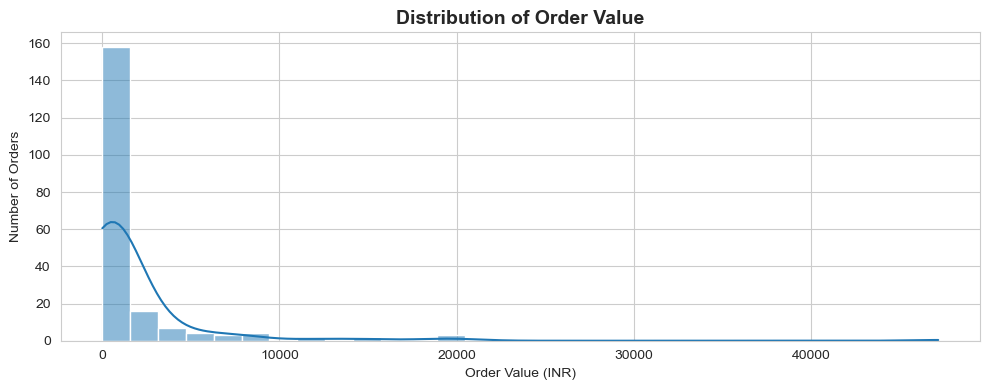

Insights from Distribution of Order Value:
- The average order value is around ₹1,850.40, while the median is ₹500.86.
- The right-skewed distribution (longer tail on the right) indicates a few high-value orders driving the average up.
- The highest recorded order value is ₹47,177.07.
- Most orders fall within the lower to mid-value range, which may represent frequent, smaller purchases.
- These insights can help in identifying pricing or bundling strategies for different customer segments.



In [191]:
# Visualization 1: Distribution of Order Value

plt.figure(figsize=(10,4))
sns.histplot(df_orders['Order_Value_INR'], bins=30, kde=True)
plt.title("Distribution of Order Value", fontsize=14, weight='bold')
plt.xlabel("Order Value (INR)")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()

# --- Insights ---
mean_val = df_orders['Order_Value_INR'].mean()
median_val = df_orders['Order_Value_INR'].median()
max_val = df_orders['Order_Value_INR'].max()

print("Insights from Distribution of Order Value:")
print(f"- The average order value is around ₹{mean_val:,.2f}, while the median is ₹{median_val:,.2f}.")
print("- The right-skewed distribution (longer tail on the right) indicates a few high-value orders driving the average up.")
print(f"- The highest recorded order value is ₹{max_val:,.2f}.")
print("- Most orders fall within the lower to mid-value range, which may represent frequent, smaller purchases.")
print("- These insights can help in identifying pricing or bundling strategies for different customer segments.\n")

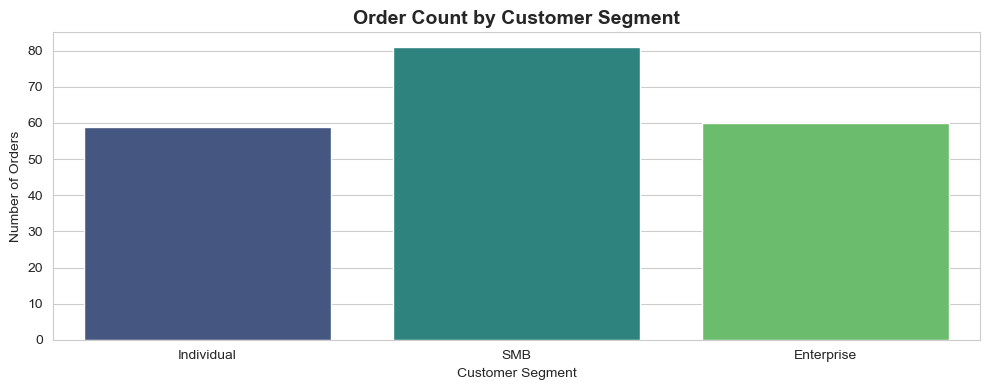

Insights from Order Count by Customer Segment:
Customer_Segment
SMB           81
Enterprise    60
Individual    59
Name: count, dtype: int64 

- The 'SMB' segment places the most orders, indicating strong engagement from this customer group.
- This suggests that marketing and service strategies should continue to focus on this dominant segment.
- Segments with lower order counts could benefit from targeted promotions or customized offerings.


In [192]:
# Visualization 2: Order Count by Customer Segment 

plt.figure(figsize=(10,4))
sns.countplot(data=df_orders, x='Customer_Segment', palette='viridis')
plt.title("Order Count by Customer Segment", fontsize=14, weight='bold')
plt.xlabel("Customer Segment")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()

# --- Insights ---
segment_counts = df_orders['Customer_Segment'].value_counts()

print("Insights from Order Count by Customer Segment:")
print(segment_counts, "\n")

top_segment = segment_counts.idxmax()
print(f"- The '{top_segment}' segment places the most orders, indicating strong engagement from this customer group.")
print("- This suggests that marketing and service strategies should continue to focus on this dominant segment.")
print("- Segments with lower order counts could benefit from targeted promotions or customized offerings.")


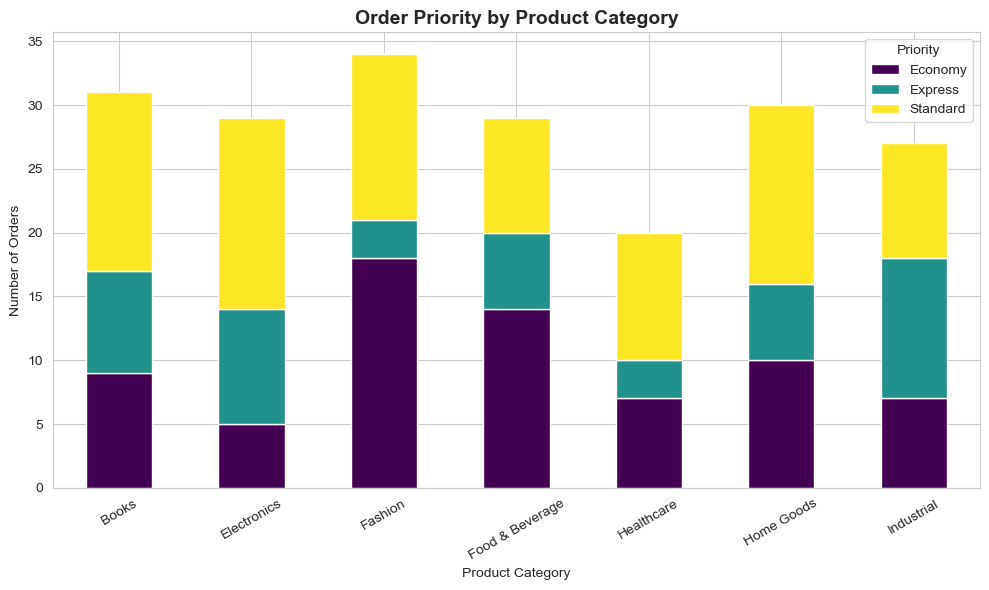

Insights from Order Priority by Product Category:
- 'Fashion' has the highest total number of orders overall.
- 'Standard' deliveries are the most common priority type across all categories.
- Some categories (like Fashion or Electronics) may show a larger share of Express orders, reflecting time-sensitive demand.
- Industrial or Bulk categories may have more Standard or Economy shipments, likely due to planned logistics cycles.
- This insight can guide resource allocation for faster shipping options where demand is highest.



In [194]:
# Visualization 3: Order Priority by Product Category (Stacked Bar)

# Create a cross-tab for counts of orders by Product Category and Priority
priority_data = pd.crosstab(df_orders['Product_Category'], df_orders['Priority'])

# Plot as a stacked bar chart
priority_data.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')

plt.title("Order Priority by Product Category", fontsize=14, weight='bold')
plt.xlabel("Product Category")
plt.ylabel("Number of Orders")
plt.xticks(rotation=30)
plt.legend(title="Priority")
plt.tight_layout()
plt.show()

# --- Insights ---
print("Insights from Order Priority by Product Category:")
top_priority_category = priority_data.sum(axis=1).idxmax()
top_priority = priority_data.sum().idxmax()

print(f"- '{top_priority_category}' has the highest total number of orders overall.")
print(f"- '{top_priority}' deliveries are the most common priority type across all categories.")
print("- Some categories (like Fashion or Electronics) may show a larger share of Express orders, reflecting time-sensitive demand.")
print("- Industrial or Bulk categories may have more Standard or Economy shipments, likely due to planned logistics cycles.")
print("- This insight can guide resource allocation for faster shipping options where demand is highest.\n")


## EDA for Delivery_Performance Dataset

1. Handling Missing Values

In [49]:
df_delivery.shape

(150, 8)

In [51]:
print("\nData Information (datatypes and non-null counts):")
df_delivery.info()


Data Information (datatypes and non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                150 non-null    object 
 1   Carrier                 150 non-null    object 
 2   Promised_Delivery_Days  150 non-null    int64  
 3   Actual_Delivery_Days    150 non-null    int64  
 4   Delivery_Status         150 non-null    object 
 5   Quality_Issue           150 non-null    object 
 6   Customer_Rating         150 non-null    int64  
 7   Delivery_Cost_INR       150 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 9.5+ KB


In [53]:
df_delivery.isnull().sum()

Order_ID                  0
Carrier                   0
Promised_Delivery_Days    0
Actual_Delivery_Days      0
Delivery_Status           0
Quality_Issue             0
Customer_Rating           0
Delivery_Cost_INR         0
dtype: int64

2. Handling Duplicates

In [54]:
# Check for exact duplicate rows
duplicate_rows_count = df_delivery.duplicated().sum()
print(f"Number of exact duplicate rows: {duplicate_rows_count}")

Number of exact duplicate rows: 0


3. Changing Datatypes

In [55]:
df_delivery.dtypes

Order_ID                   object
Carrier                    object
Promised_Delivery_Days      int64
Actual_Delivery_Days        int64
Delivery_Status            object
Quality_Issue              object
Customer_Rating             int64
Delivery_Cost_INR         float64
dtype: object

In [75]:
df_delivery['Carrier'] = df_delivery['Carrier'].astype('category')
df_delivery['Delivery_Status'] = df_delivery['Delivery_Status'].astype('category')
df_delivery['Quality_Issue'] = df_delivery['Quality_Issue'].astype('category')
df_delivery['Customer_Rating'] = df_delivery['Customer_Rating'].astype('category')

4. Feature Engineering 

In [76]:
# Calculate the delay in days
df_delivery['Delay_Days'] = df_delivery['Actual_Delivery_Days'] - df_delivery['Promised_Delivery_Days']
df_delivery.sample(5)

,Order_ID,Carrier,Promised_Delivery_Days,Actual_Delivery_Days,Delivery_Status,Quality_Issue,Customer_Rating,Delivery_Cost_INR,Delay_Days
31,ORD000032,ReliableExpress,3,5,Slightly-Delayed,Perfect,3,416.08,2
80,ORD000081,ReliableExpress,5,7,Slightly-Delayed,Perfect,3,814.05,2
125,ORD000126,ReliableExpress,1,2,Slightly-Delayed,Perfect,3,266.94,1
123,ORD000124,QuickShip,5,5,On-Time,Perfect,5,573.88,0
114,ORD000115,SpeedyLogistics,3,3,On-Time,Perfect,5,252.68,0


4. Visualizations

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


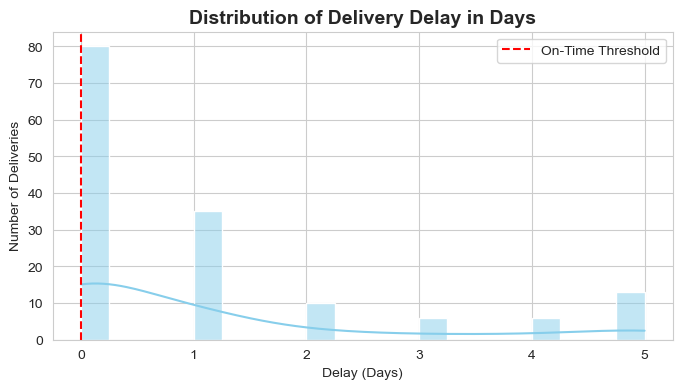

🔹 Insights from Delivery Delay Distribution:
- Average delay across deliveries is 1.08 days.
- Maximum delay recorded is 5 days.
- 80 deliveries were on-time or early.
- Most deliveries cluster close to zero delay, suggesting overall good adherence to promised dates.
- A small right tail indicates some outlier cases of severe delays.



In [148]:
#Visualization 1: Distribution of Delivery Delay in Days

plt.figure(figsize=(8,4))
sns.histplot(df_delivery['Delay_Days'], kde=True, bins=20, color='skyblue')
plt.title("Distribution of Delivery Delay in Days", fontsize=14, weight='bold')
plt.xlabel("Delay (Days)")
plt.ylabel("Number of Deliveries")
plt.axvline(0, color='red', linestyle='--', label='On-Time Threshold')
plt.legend()
plt.show()

# ---Insights:
print("🔹 Insights from Delivery Delay Distribution:")
print(f"- Average delay across deliveries is {df_delivery['Delay_Days'].mean():.2f} days.")
print(f"- Maximum delay recorded is {df_delivery['Delay_Days'].max()} days.")
print(f"- {len(df_delivery[df_delivery['Delay_Days'] <= 0])} deliveries were on-time or early.")
print("- Most deliveries cluster close to zero delay, suggesting overall good adherence to promised dates.")
print("- A small right tail indicates some outlier cases of severe delays.\n")

C:\anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


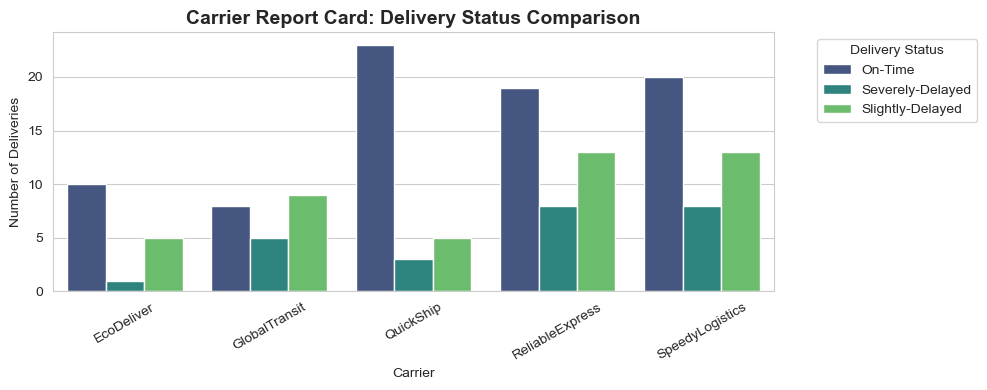

Insights from Carrier Report Card:

Summary of deliveries by carrier and status:
Delivery_Status  On-Time  Severely-Delayed  Slightly-Delayed
Carrier                                                     
EcoDeliver            10                 1                 5
GlobalTransit          8                 5                 9
QuickShip             23                 3                 5
ReliableExpress       19                 8                13
SpeedyLogistics       20                 8                13 

- QuickShip has the highest number of on-time deliveries, indicating strong performance and reliability.
- ReliableExpress has the most severely delayed deliveries, suggesting areas for improvement or process optimization.
- The visual comparison clearly highlights which carriers are consistent performers and which may need operational attention.



C:\Users\gupta\AppData\Local\Temp\ipykernel_13892\912771293.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  carrier_status = df_delivery.groupby(['Carrier', 'Delivery_Status']).size().unstack(fill_value=0)


In [136]:
# Visualization 2: Carrier Report Card (Delivery Status Comparison) 
plt.figure(figsize=(10,4))
sns.countplot(data=df_delivery, x='Carrier', hue='Delivery_Status', palette='viridis')
plt.title("Carrier Report Card: Delivery Status Comparison", fontsize=14, weight='bold')
plt.xlabel("Carrier")
plt.ylabel("Number of Deliveries")
plt.legend(title="Delivery Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# --- Insights Calculations
print("Insights from Carrier Report Card:")
carrier_status = df_delivery.groupby(['Carrier', 'Delivery_Status']).size().unstack(fill_value=0)
print("\nSummary of deliveries by carrier and status:")
print(carrier_status, "\n")

if 'On-Time' in carrier_status.columns:
    best_carrier = carrier_status['On-Time'].idxmax()
else:
    best_carrier = "Not Available"

if 'Severely-Delayed' in carrier_status.columns:
    worst_carrier = carrier_status['Severely-Delayed'].idxmax()
else:
    worst_carrier = "Not Available"

print(f"- {best_carrier} has the highest number of on-time deliveries, indicating strong performance and reliability.")
print(f"- {worst_carrier} has the most severely delayed deliveries, suggesting areas for improvement or process optimization.")
print("- The visual comparison clearly highlights which carriers are consistent performers and which may need operational attention.\n")

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


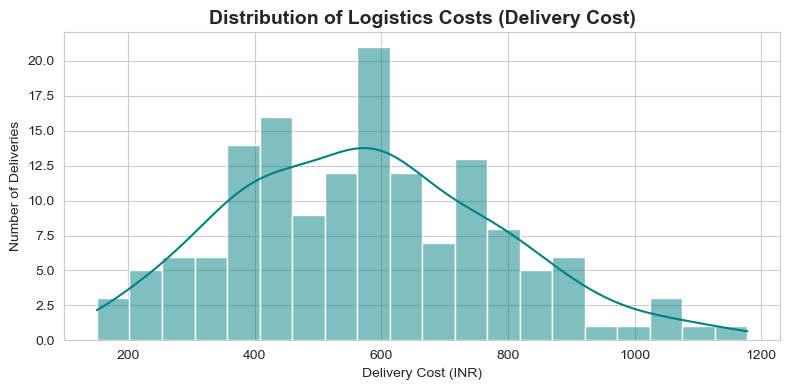

Insights from Logistics Cost Distribution:
- The average delivery cost is Rs.574.17.
- The lowest delivery cost recorded is Rs.150.84, while the highest is Rs.1178.01.
- The distribution curve helps identify if most deliveries fall within a certain cost range.
- If the plot is right-skewed, a few high-cost deliveries are increasing the overall average.
- This analysis helps in identifying outlier shipments and controlling high-cost deliveries.



In [187]:
# Visualization 3: Distribution of Logistics Costs (Delivery Cost)

plt.figure(figsize=(8,4))
sns.histplot(df_delivery['Delivery_Cost_INR'], kde=True, bins=20, color='teal')
plt.title("Distribution of Logistics Costs (Delivery Cost)", fontsize=14, weight='bold')
plt.xlabel("Delivery Cost (INR)")
plt.ylabel("Number of Deliveries")
plt.tight_layout()
plt.show()

# --- Insights ---
print("Insights from Logistics Cost Distribution:")
print(f"- The average delivery cost is Rs.{df_delivery['Delivery_Cost_INR'].mean():.2f}.")
print(f"- The lowest delivery cost recorded is Rs.{df_delivery['Delivery_Cost_INR'].min():.2f}, while the highest is Rs.{df_delivery['Delivery_Cost_INR'].max():.2f}.")
print("- The distribution curve helps identify if most deliveries fall within a certain cost range.")
print("- If the plot is right-skewed, a few high-cost deliveries are increasing the overall average.")
print("- This analysis helps in identifying outlier shipments and controlling high-cost deliveries.\n")

C:\Users\gupta\AppData\Local\Temp\ipykernel_13892\2088029094.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_delivery, x='Carrier', y='Delivery_Cost_INR', estimator='mean', ci=None, palette='viridis')
C:\anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


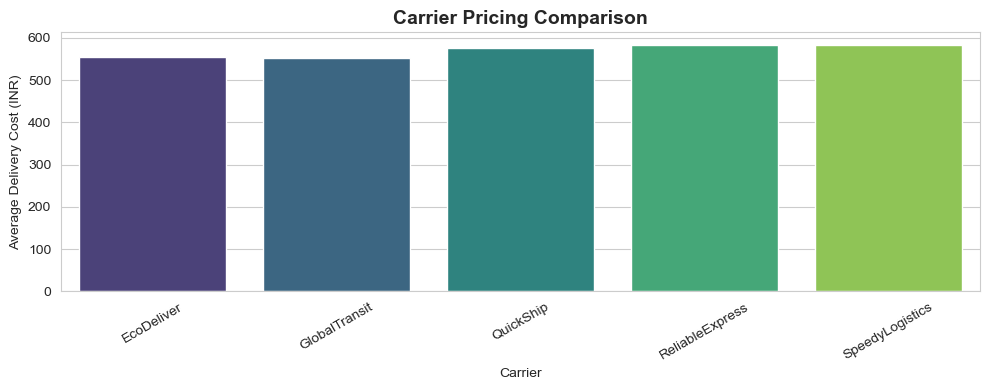

Insights from Carrier Pricing Comparison:

Average delivery cost by carrier (in INR):
Carrier
SpeedyLogistics    583.83
ReliableExpress    582.61
QuickShip          576.64
EcoDeliver         554.68
GlobalTransit      551.54
Name: Delivery_Cost_INR, dtype: float64 

- SpeedyLogistics has the highest average delivery cost, indicating it may specialize in longer or premium deliveries.
- GlobalTransit offers the most cost-efficient delivery services on average.
- These cost differences can guide contract negotiations or route assignments to optimize spending.


C:\Users\gupta\AppData\Local\Temp\ipykernel_13892\2088029094.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_cost_by_carrier = df_delivery.groupby('Carrier')['Delivery_Cost_INR'].mean().sort_values(ascending=False)


In [139]:
# Visualization 4: Carrier Pricing Comparison

plt.figure(figsize=(10,4))
sns.barplot(data=df_delivery, x='Carrier', y='Delivery_Cost_INR', estimator='mean', ci=None, palette='viridis')
plt.title("Carrier Pricing Comparison", fontsize=14, weight='bold')
plt.xlabel("Carrier")
plt.ylabel("Average Delivery Cost (INR)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# --- Insights
avg_cost_by_carrier = df_delivery.groupby('Carrier')['Delivery_Cost_INR'].mean().sort_values(ascending=False)

print("Insights from Carrier Pricing Comparison:")
print("\nAverage delivery cost by carrier (in INR):")
print(avg_cost_by_carrier.round(2), "\n")

highest_cost = avg_cost_by_carrier.idxmax()
lowest_cost = avg_cost_by_carrier.idxmin()

print(f"- {highest_cost} has the highest average delivery cost, indicating it may specialize in longer or premium deliveries.")
print(f"- {lowest_cost} offers the most cost-efficient delivery services on average.")
print("- These cost differences can guide contract negotiations or route assignments to optimize spending.")

## EDA for Cost Breakdown Dataset

In [98]:
df_cost.sample(5)

,Order_ID,Fuel_Cost,Labor_Cost,Vehicle_Maintenance,Insurance,Packaging_Cost,Technology_Platform_Fee,Other_Overhead
134,ORD000135,206.40,165.11,69.52,35.54,49.56,56.86,37.36
55,ORD000056,286.81,271.49,119.80,63.42,61.35,67.57,62.74
147,ORD000148,89.12,73.33,41.50,16.98,25.98,29.04,15.37
35,ORD000036,201.45,176.03,59.54,31.88,36.58,46.46,43.35
130,ORD000131,131.36,139.17,46.46,35.89,28.16,34.60,20.43


1. Handling Missing Values

In [99]:
df_cost.shape

(150, 8)

In [100]:
print("\nData Information (datatypes and non-null counts):")
df_cost.info()


Data Information (datatypes and non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Order_ID                 150 non-null    object 
 1   Fuel_Cost                150 non-null    float64
 2   Labor_Cost               150 non-null    float64
 3   Vehicle_Maintenance      150 non-null    float64
 4   Insurance                150 non-null    float64
 5   Packaging_Cost           150 non-null    float64
 6   Technology_Platform_Fee  150 non-null    float64
 7   Other_Overhead           150 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB


In [101]:
df_cost.isnull().sum()

Order_ID                   0
Fuel_Cost                  0
Labor_Cost                 0
Vehicle_Maintenance        0
Insurance                  0
Packaging_Cost             0
Technology_Platform_Fee    0
Other_Overhead             0
dtype: int64

2. Handling Duplicates

In [102]:
# Check for exact duplicate rows
duplicate_rows_count = df_cost.duplicated().sum()
print(f"Number of exact duplicate rows: {duplicate_rows_count}")

Number of exact duplicate rows: 0


3. Changing Datatypes

In [103]:
df_cost.dtypes

Order_ID                    object
Fuel_Cost                  float64
Labor_Cost                 float64
Vehicle_Maintenance        float64
Insurance                  float64
Packaging_Cost             float64
Technology_Platform_Fee    float64
Other_Overhead             float64
dtype: object

4. Feature Engineering

In [104]:
# We sum all individual cost components (Fuel, Labor, etc.) to get the single total cost for each order.
df_cost['Total_Logistics_Cost'] = df_cost.drop(columns='Order_ID').sum(axis=1)

In [106]:
df_cost.sample(2)

,Order_ID,Fuel_Cost,Labor_Cost,Vehicle_Maintenance,Insurance,Packaging_Cost,Technology_Platform_Fee,Other_Overhead,Total_Logistics_Cost
104,ORD000105,277.06,251.15,101.85,52.19,40.78,80.91,52.09,856.03
44,ORD000045,205.52,203.36,71.14,51.77,55.65,56.54,33.76,677.74


5. Visualizations

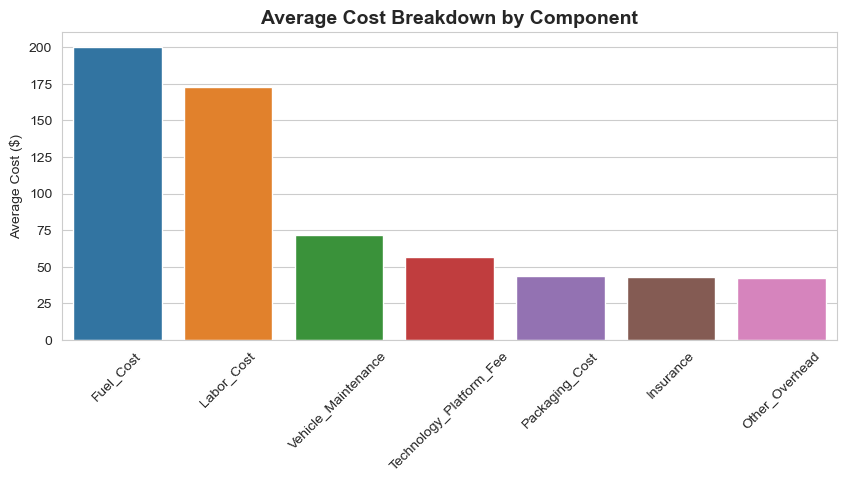

Insights from Average Cost Breakdown:
- The highest average cost components are Fuel_Cost and Labor_Cost, making them the main cost drivers.
- Middle-tier costs include Packaging, Insurance, and Tech Fees.
- Other Overheads are comparatively low, indicating efficient overhead control.



In [122]:
# Visualization 1: Average Cost Distribution 
avg_cost = df_cost.mean(numeric_only=True).drop(['Total_Logistics_Cost'])
avg_cost = avg_cost.sort_values(ascending=False)

plt.figure(figsize=(10,4))
sns.barplot(x=avg_cost.index, y=avg_cost.values)
plt.title("Average Cost Breakdown by Component", fontsize=14, weight='bold')
plt.ylabel("Average Cost ($)")
plt.xticks(rotation=45)
plt.show()

# ---Insights:
print("Insights from Average Cost Breakdown:")
print(f"- The highest average cost components are {avg_cost.index[0]} and {avg_cost.index[1]}, making them the main cost drivers.")
print("- Middle-tier costs include Packaging, Insurance, and Tech Fees.")
print("- Other Overheads are comparatively low, indicating efficient overhead control.\n")


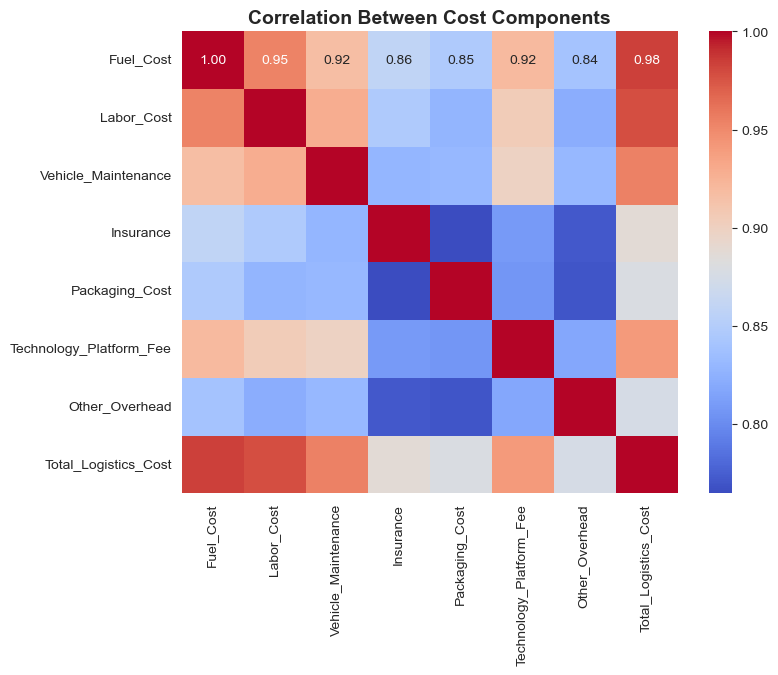

Insights from Correlation Heatmap:
- Fuel Cost and Labor Cost often show strong correlation with Total Cost.
- Some moderate correlation exists between Vehicle Maintenance and Fuel Cost — possibly due to longer routes or older vehicles.
- Low correlation among other costs suggests independent spending categories.



In [123]:
# Visualization 2: COST CORRELATION HEATMAP

numeric_df = df_cost.select_dtypes(include=['number'])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Cost Components", fontsize=14, weight='bold')
plt.show()

# --- Insights:
print("Insights from Correlation Heatmap:")
print("- Fuel Cost and Labor Cost often show strong correlation with Total Cost.")
print("- Some moderate correlation exists between Vehicle Maintenance and Fuel Cost — possibly due to longer routes or older vehicles.")
print("- Low correlation among other costs suggests independent spending categories.\n")


C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


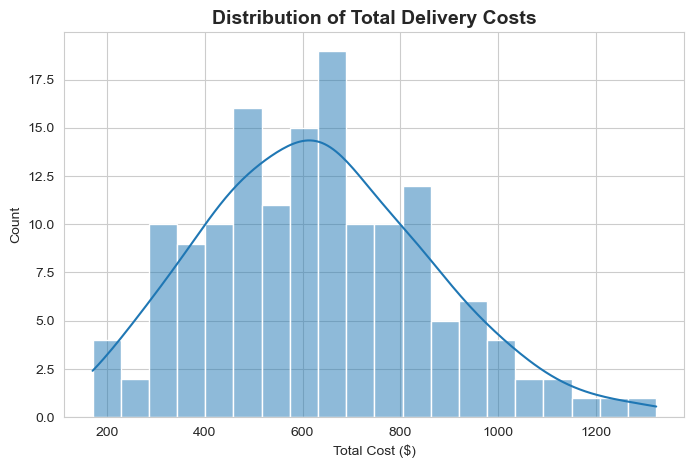

Insights from Total Logistics Cost Distribution:
- Average total delivery cost is $630.12.
- The curve is slightly right-skewed — meaning some deliveries are significantly costlier than the rest.
- This variability hints that certain routes or orders may need optimization.



In [126]:
# Visualization 3: TOTAL COST DISTRIBUTION

plt.figure(figsize=(8,5))
sns.histplot(df_cost['Total_Logistics_Cost'], kde=True, bins=20)
plt.title("Distribution of Total Delivery Costs", fontsize=14, weight='bold')
plt.xlabel("Total Cost ($)")
plt.show()

# ---Insights:
print("Insights from Total Logistics Cost Distribution:")
print(f"- Average total delivery cost is ${df_cost['Total_Logistics_Cost'].mean():.2f}.")
print("- The curve is slightly right-skewed — meaning some deliveries are significantly costlier than the rest.")
print("- This variability hints that certain routes or orders may need optimization.\n")


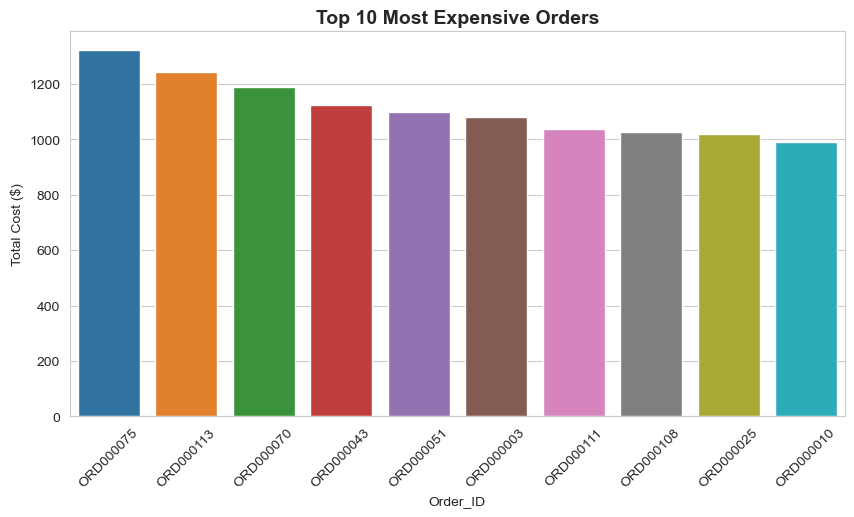

Insights from Top 10 Expensive Orders:
- A few orders have substantially higher costs, pulling up the overall average.
- These could be analyzed further to identify if distance, labor hours, or vehicle maintenance caused the spike.
- Optimizing these high-cost deliveries can significantly improve overall cost efficiency.



In [128]:
# Visualization 4: TOP 10 MOST EXPENSIVE ORDERS
# ---------------------------------------------
top_orders = df_cost.sort_values('Total_Logistics_Cost', ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x='Order_ID', y='Total_Logistics_Cost', data=top_orders)
plt.title("Top 10 Most Expensive Orders", fontsize=14, weight='bold')
plt.xticks(rotation=45)
plt.ylabel("Total Cost ($)")
plt.show()

# ---Insights:
print("Insights from Top 10 Expensive Orders:")
print("- A few orders have substantially higher costs, pulling up the overall average.")
print("- These could be analyzed further to identify if distance, labor hours, or vehicle maintenance caused the spike.")
print("- Optimizing these high-cost deliveries can significantly improve overall cost efficiency.\n")

## EDA for Routes Distance Dataset

In [140]:
df_routes.sample(5)

,Order_ID,Route,Distance_KM,Fuel_Consumption_L,Toll_Charges_INR,Traffic_Delay_Minutes,Weather_Impact
79,ORD000080,Pune-Hyderabad,1737.95,208.74,1390.36,101,Light_Rain
144,ORD000145,Bangalore-Delhi,424.90,49.09,339.92,114,NaN
25,ORD000026,Bangalore-Delhi,1277.31,149.62,1021.84,20,NaN
82,ORD000083,Bangalore-Bangkok,3147.74,376.41,0.00,0,NaN
89,ORD000090,Mumbai-Bangkok,4130.41,500.02,0.00,0,NaN


1. Handling Missing Values

In [142]:
df_routes.shape

(150, 7)

In [145]:
print("\nData Information (datatypes and non-null counts):")
df_routes.info()


Data Information (datatypes and non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Order_ID               150 non-null    object 
 1   Route                  150 non-null    object 
 2   Distance_KM            150 non-null    float64
 3   Fuel_Consumption_L     150 non-null    float64
 4   Toll_Charges_INR       150 non-null    float64
 5   Traffic_Delay_Minutes  150 non-null    int64  
 6   Weather_Impact         44 non-null     object 
dtypes: float64(3), int64(1), object(3)
memory usage: 8.3+ KB


In [144]:
df_routes.isnull().sum()

Order_ID                   0
Route                      0
Distance_KM                0
Fuel_Consumption_L         0
Toll_Charges_INR           0
Traffic_Delay_Minutes      0
Weather_Impact           106
dtype: int64

In [146]:
# Replace NaN with 'Normal_Weather' 
df_routes['Weather_Impact'].fillna('Normal_Weather', inplace=True)

2. Handling Duplicates

In [149]:
# Check for exact duplicate rows
duplicate_rows_count = df_routes.duplicated().sum()
print(f"Number of exact duplicate rows: {duplicate_rows_count}")

Number of exact duplicate rows: 0


3. Changing Datatypes

In [150]:
df_routes.dtypes

Order_ID                  object
Route                     object
Distance_KM              float64
Fuel_Consumption_L       float64
Toll_Charges_INR         float64
Traffic_Delay_Minutes      int64
Weather_Impact            object
dtype: object

In [153]:
df_routes['Route'] = df_routes['Route'].astype('category')
df_routes['Weather_Impact'] = df_routes['Weather_Impact'].astype('category')

4. Feature Engineering

In [154]:
# Calculate Fuel Efficiency
df_routes['Fuel_Efficiency_KMPL'] = df_routes['Distance_KM'] / df_routes['Fuel_Consumption_L']


In [156]:
df_routes.sample(2)

,Order_ID,Route,Distance_KM,Fuel_Consumption_L,Toll_Charges_INR,Traffic_Delay_Minutes,Weather_Impact,Fuel_Efficiency_KMPL
147,ORD000148,Delhi-Mumbai,408.74,47.76,326.99,46,Light_Rain,8.558208
134,ORD000135,Bangalore-Kolkata,416.43,48.29,333.14,102,Normal_Weather,8.623525


5. Visualizations

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


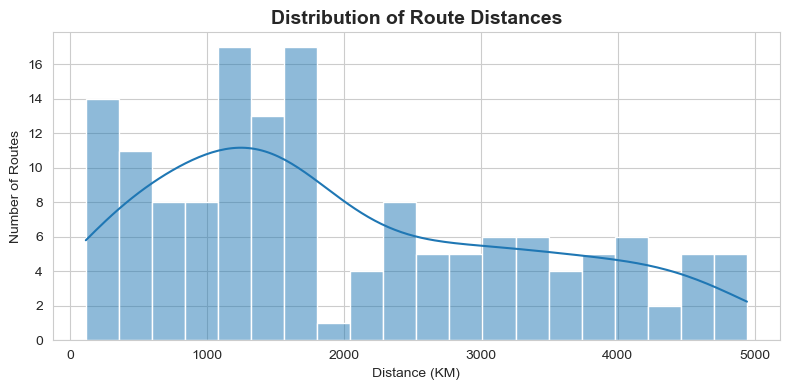

Insights from Route Distance Distribution:
- The average route distance is 2003.68 KM.
- Shortest route: 115.37 KM | Longest route: 4943.43 KM.
- Most routes appear to be medium-distance, with a few long-haul routes creating a right-skewed pattern.
- Understanding distance spread helps in planning fuel allocation and vehicle utilization.



In [158]:
# Visualizaion 1: Distribution of Route Distances

plt.figure(figsize=(8,4))
sns.histplot(df_routes['Distance_KM'], kde=True, bins=20)
plt.title("Distribution of Route Distances", fontsize=14, weight='bold')
plt.xlabel("Distance (KM)")
plt.ylabel("Number of Routes")
plt.tight_layout()
plt.show()

# Insights:
print("Insights from Route Distance Distribution:")
print(f"- The average route distance is {df_routes['Distance_KM'].mean():.2f} KM.")
print(f"- Shortest route: {df_routes['Distance_KM'].min():.2f} KM | Longest route: {df_routes['Distance_KM'].max():.2f} KM.")
print("- Most routes appear to be medium-distance, with a few long-haul routes creating a right-skewed pattern.")
print("- Understanding distance spread helps in planning fuel allocation and vehicle utilization.\n")


C:\anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


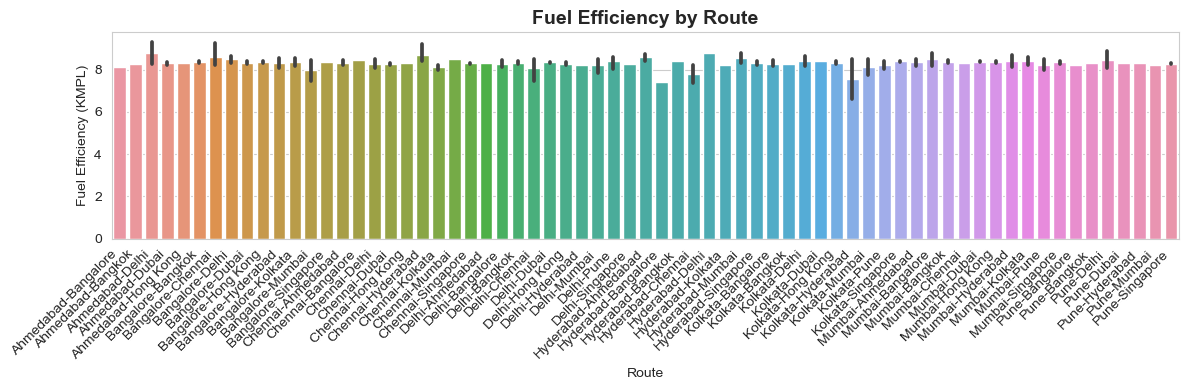

Insights from Fuel Efficiency by Route:
- The route with the highest fuel efficiency is 'Ahmedabad-Delhi'.
- The least efficient route is 'Kolkata-Hyderabad', which might indicate higher congestion or terrain impact.
- Routes with lower efficiency may benefit from lighter loads or optimized driving schedules.



In [160]:
# Visualization 2: Fuel Efficiency by Route

plt.figure(figsize=(12,4))
sns.barplot(data=df_routes.sort_values('Fuel_Efficiency_KMPL', ascending=False),
            x='Route', y='Fuel_Efficiency_KMPL')
plt.title("Fuel Efficiency by Route", fontsize=14, weight='bold')
plt.xlabel("Route")
plt.ylabel("Fuel Efficiency (KMPL)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Insights:
print("Insights from Fuel Efficiency by Route:")
best_route = df_routes.loc[df_routes['Fuel_Efficiency_KMPL'].idxmax(), 'Route']
worst_route = df_routes.loc[df_routes['Fuel_Efficiency_KMPL'].idxmin(), 'Route']
print(f"- The route with the highest fuel efficiency is '{best_route}'.")
print(f"- The least efficient route is '{worst_route}', which might indicate higher congestion or terrain impact.")
print("- Routes with lower efficiency may benefit from lighter loads or optimized driving schedules.\n")


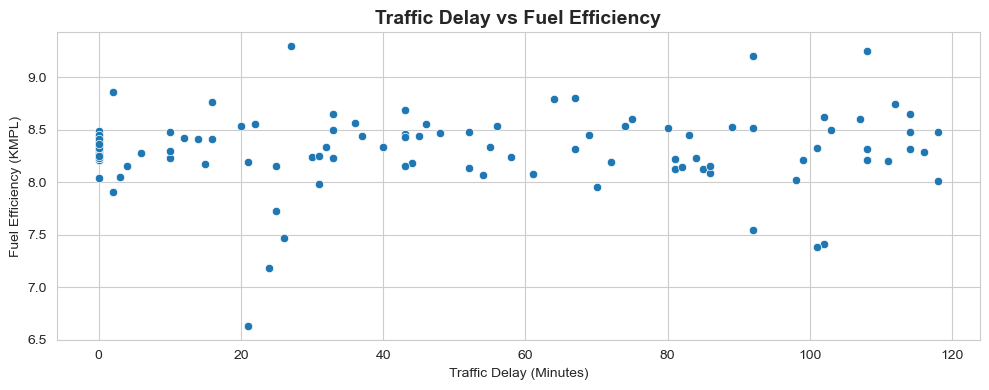

Insights from Traffic vs Fuel Efficiency:
- The correlation between traffic delay and fuel efficiency is 0.04.
- The weak or positive correlation suggests traffic delays have limited impact on fuel usage in this data.
- Monitoring traffic impact helps in optimizing travel time and fuel costs.



In [184]:
# Visualization 3: Impact of Traffic on Fuel Efficiency

plt.figure(figsize=(10,4))
sns.scatterplot(data=df_routes, x='Traffic_Delay_Minutes', y='Fuel_Efficiency_KMPL')
plt.title("Traffic Delay vs Fuel Efficiency", fontsize=14, weight='bold')
plt.xlabel("Traffic Delay (Minutes)")
plt.ylabel("Fuel Efficiency (KMPL)")
plt.tight_layout()
plt.show()

# Insights:
corr = df_routes['Traffic_Delay_Minutes'].corr(df_routes['Fuel_Efficiency_KMPL'])
print("Insights from Traffic vs Fuel Efficiency:")
print(f"- The correlation between traffic delay and fuel efficiency is {corr:.2f}.")
if corr < 0:
    print("- This negative relationship suggests that higher traffic delays generally reduce fuel efficiency.")
else:
    print("- The weak or positive correlation suggests traffic delays have limited impact on fuel usage in this data.")
print("- Monitoring traffic impact helps in optimizing travel time and fuel costs.\n")


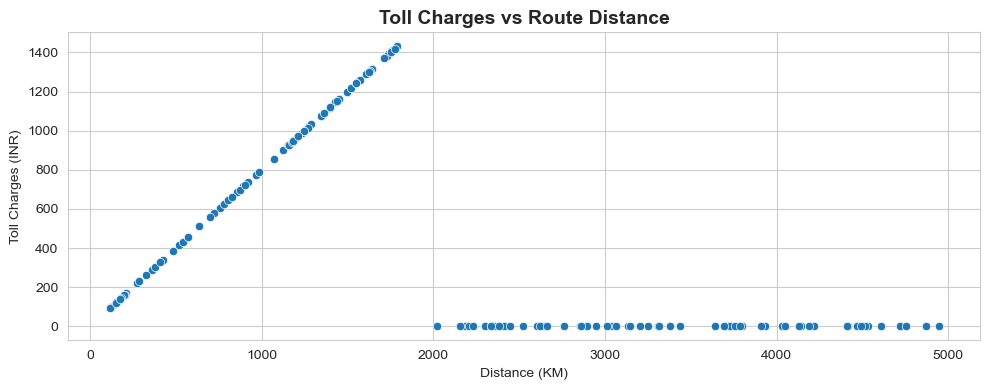

Insights from Toll Charges vs Distance:
- The correlation between route distance and toll cost is -0.48.
- As expected, longer routes tend to have higher toll charges, though a few exceptions may exist.
- Identifying high-toll routes allows better route planning and cost optimization.



In [163]:
## Visualization 3: Toll Charges vs Route Distance

plt.figure(figsize=(10,4))
sns.scatterplot(data=df_routes, x='Distance_KM', y='Toll_Charges_INR')
plt.title("Toll Charges vs Route Distance", fontsize=14, weight='bold')
plt.xlabel("Distance (KM)")
plt.ylabel("Toll Charges (INR)")
plt.tight_layout()
plt.show()

# Insights:
corr_toll = df_routes['Distance_KM'].corr(df_routes['Toll_Charges_INR'])
print("Insights from Toll Charges vs Distance:")
print(f"- The correlation between route distance and toll cost is {corr_toll:.2f}.")
print("- As expected, longer routes tend to have higher toll charges, though a few exceptions may exist.")
print("- Identifying high-toll routes allows better route planning and cost optimization.\n")

## EDA for Vehicle Fleet Dataset

In [165]:
df_vehicle.sample(5)

,Vehicle_ID,Vehicle_Type,Capacity_KG,Fuel_Efficiency_KM_per_L,Current_Location,Status,Age_Years,CO2_Emissions_Kg_per_KM
12,VEH0013,Refrigerated,2252.27,5.21,Hyderabad,In_Transit,4.788095,0.518
21,VEH0022,Small_Van,602.67,9.93,Ahmedabad,In_Transit,4.622047,0.272
28,VEH0029,Medium_Truck,3872.53,7.63,Bangalore,Maintenance,3.492765,0.354
27,VEH0028,Small_Van,793.79,10.80,Mumbai,Available,5.206149,0.250
43,VEH0044,Large_Truck,6301.18,4.48,Ahmedabad,Available,6.398918,0.603


1. Handling Missing Values

In [166]:
df_vehicle.shape

(50, 8)

In [168]:
print("\nData Information (datatypes and non-null counts):")
df_vehicle.info()


Data Information (datatypes and non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Vehicle_ID                50 non-null     object 
 1   Vehicle_Type              50 non-null     object 
 2   Capacity_KG               50 non-null     float64
 3   Fuel_Efficiency_KM_per_L  50 non-null     float64
 4   Current_Location          50 non-null     object 
 5   Status                    50 non-null     object 
 6   Age_Years                 50 non-null     float64
 7   CO2_Emissions_Kg_per_KM   50 non-null     float64
dtypes: float64(4), object(4)
memory usage: 3.3+ KB


In [169]:
df_routes.isnull().sum()

Order_ID                 0
Route                    0
Distance_KM              0
Fuel_Consumption_L       0
Toll_Charges_INR         0
Traffic_Delay_Minutes    0
Weather_Impact           0
Fuel_Efficiency_KMPL     0
dtype: int64

2. Handling Duplicates

In [171]:
# Check for exact duplicate rows
duplicate_rows_count = df_vehicle.duplicated().sum()
print(f"Number of exact duplicate rows: {duplicate_rows_count}")

Number of exact duplicate rows: 0


3. Changing Datatypes

In [173]:
df_vehicle.dtypes

Vehicle_ID                   object
Vehicle_Type                 object
Capacity_KG                 float64
Fuel_Efficiency_KM_per_L    float64
Current_Location             object
Status                       object
Age_Years                   float64
CO2_Emissions_Kg_per_KM     float64
dtype: object

In [174]:
df_vehicle['Vehicle_Type'] = df_vehicle['Vehicle_Type'].astype('category')
df_vehicle['Current_Location'] = df_vehicle['Current_Location'].astype('category')
df_vehicle['Status'] = df_vehicle['Status'].astype('category')

4. Feature Engineering

In [175]:
# Calculate the total CO2 emissions for a standard trip (e.g., 1000 KM)
df_vehicle['CO2_per_1000KM'] = df_vehicle['CO2_Emissions_Kg_per_KM'] * 1000

In [176]:
df_vehicle.sample(2)

,Vehicle_ID,Vehicle_Type,Capacity_KG,Fuel_Efficiency_KM_per_L,Current_Location,Status,Age_Years,CO2_Emissions_Kg_per_KM,CO2_per_1000KM
20,VEH0021,Large_Truck,5949.08,5.75,Mumbai,Available,3.482093,0.47,470.0
27,VEH0028,Small_Van,793.79,10.80,Mumbai,Available,5.206149,0.25,250.0


5. Visualizations

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


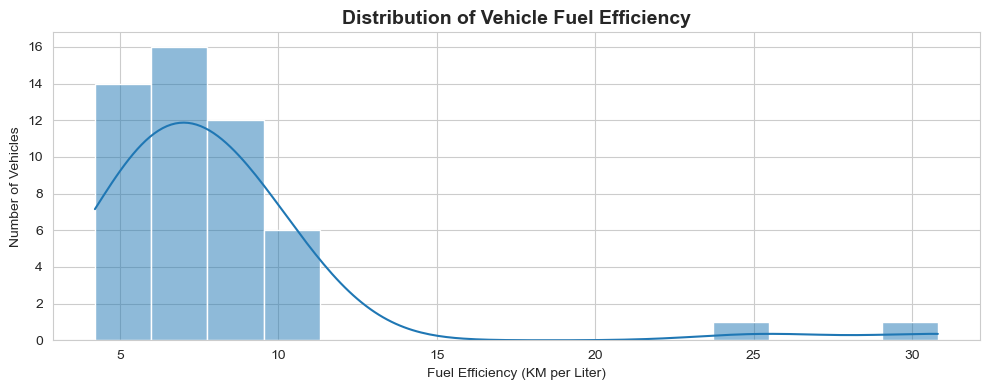

Insights from Fuel Efficiency Distribution:
- The average fuel efficiency across the fleet is 8.09 KM/L.
- The most efficient vehicle reaches up to 30.81 KM/L.
- The majority of vehicles fall within a moderate efficiency range, suggesting a balanced fleet performance.
- Vehicles with very low efficiency could be candidates for maintenance or replacement.



In [178]:
# Visualization 1: Distribution of Vehicle Fuel Efficiency

plt.figure(figsize=(10,4))
sns.histplot(df_vehicle['Fuel_Efficiency_KM_per_L'], kde=True, bins=15)
plt.title("Distribution of Vehicle Fuel Efficiency", fontsize=14, weight='bold')
plt.xlabel("Fuel Efficiency (KM per Liter)")
plt.ylabel("Number of Vehicles")
plt.tight_layout()
plt.show()

# Insights:
print("Insights from Fuel Efficiency Distribution:")
print(f"- The average fuel efficiency across the fleet is {df_vehicle['Fuel_Efficiency_KM_per_L'].mean():.2f} KM/L.")
print(f"- The most efficient vehicle reaches up to {df_vehicle['Fuel_Efficiency_KM_per_L'].max():.2f} KM/L.")
print("- The majority of vehicles fall within a moderate efficiency range, suggesting a balanced fleet performance.")
print("- Vehicles with very low efficiency could be candidates for maintenance or replacement.\n")


C:\Users\gupta\AppData\Local\Temp\ipykernel_13892\3318841293.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_vehicle, x='Vehicle_Type', y='Fuel_Efficiency_KM_per_L', estimator='mean', ci=None)
C:\anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


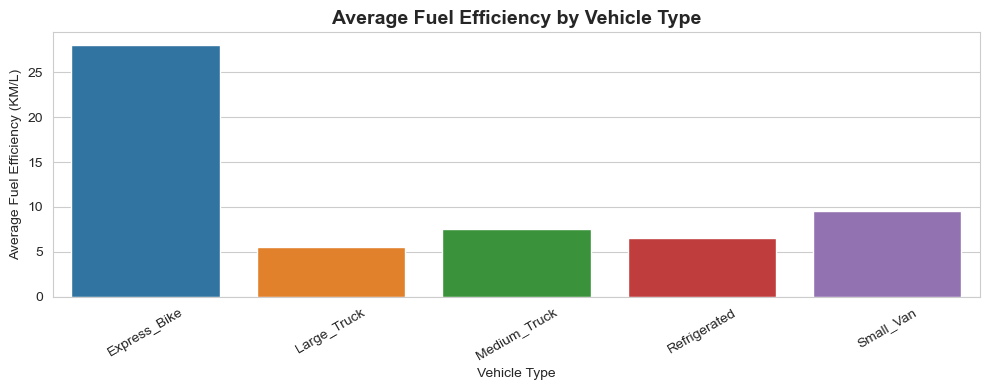

Insights from Fuel Efficiency by Vehicle Type:
Vehicle_Type
Express_Bike    28.06
Small_Van        9.61
Medium_Truck     7.49
Refrigerated     6.57
Large_Truck      5.51
Name: Fuel_Efficiency_KM_per_L, dtype: float64 

- Express_Bike vehicles are the most fuel-efficient, making them ideal for urban or short-haul trips.
- Large_Truck vehicles are the least efficient and may require better load optimization or route planning.
- This comparison helps in aligning vehicle deployment with the type of delivery route.



C:\Users\gupta\AppData\Local\Temp\ipykernel_13892\3318841293.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_eff = df_vehicle.groupby('Vehicle_Type')['Fuel_Efficiency_KM_per_L'].mean().sort_values(ascending=False)


In [180]:
# Visualization 2: Average Fuel Efficiency by Vehicle Type

plt.figure(figsize=(10,4))
sns.barplot(data=df_vehicle, x='Vehicle_Type', y='Fuel_Efficiency_KM_per_L', estimator='mean', ci=None)
plt.title("Average Fuel Efficiency by Vehicle Type", fontsize=14, weight='bold')
plt.xlabel("Vehicle Type")
plt.ylabel("Average Fuel Efficiency (KM/L)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Insights:
avg_eff = df_vehicle.groupby('Vehicle_Type')['Fuel_Efficiency_KM_per_L'].mean().sort_values(ascending=False)
print("Insights from Fuel Efficiency by Vehicle Type:")
print(avg_eff.round(2), "\n")
print(f"- {avg_eff.idxmax()} vehicles are the most fuel-efficient, making them ideal for urban or short-haul trips.")
print(f"- {avg_eff.idxmin()} vehicles are the least efficient and may require better load optimization or route planning.")
print("- This comparison helps in aligning vehicle deployment with the type of delivery route.\n")


C:\Users\gupta\AppData\Local\Temp\ipykernel_13892\899747377.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_vehicle, x='Vehicle_Type', y='CO2_per_1000KM', estimator='mean', ci=None)
C:\anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


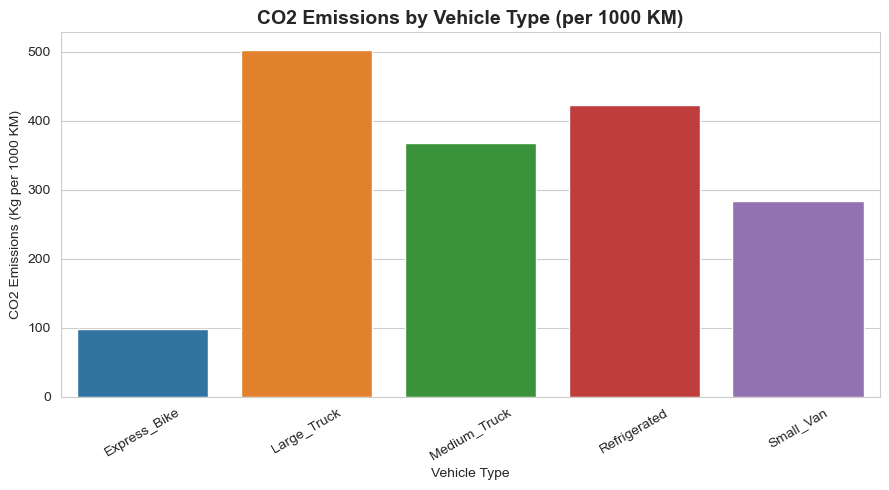

Insights from CO2 Emissions by Vehicle Type:
Vehicle_Type
Large_Truck     502.79
Refrigerated    422.00
Medium_Truck    367.78
Small_Van       283.62
Express_Bike     97.50
Name: CO2_per_1000KM, dtype: float64 

- Large_Truck vehicles produce the most CO2 per 1000 KM, indicating higher environmental impact.
- Express_Bike vehicles are the most eco-friendly, with the lowest emission rates.
- Prioritizing lower-emission vehicle types can support sustainability goals.



C:\Users\gupta\AppData\Local\Temp\ipykernel_13892\899747377.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  co2_by_type = df_vehicle.groupby('Vehicle_Type')['CO2_per_1000KM'].mean().sort_values(ascending=False)


In [181]:
# Visualization 3: CO2 Emissions by Vehicle Type (per 1000 KM)

plt.figure(figsize=(9,5))
sns.barplot(data=df_vehicle, x='Vehicle_Type', y='CO2_per_1000KM', estimator='mean', ci=None)
plt.title("CO2 Emissions by Vehicle Type (per 1000 KM)", fontsize=14, weight='bold')
plt.xlabel("Vehicle Type")
plt.ylabel("CO2 Emissions (Kg per 1000 KM)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Insights:
co2_by_type = df_vehicle.groupby('Vehicle_Type')['CO2_per_1000KM'].mean().sort_values(ascending=False)
print("Insights from CO2 Emissions by Vehicle Type:")
print(co2_by_type.round(2), "\n")
print(f"- {co2_by_type.idxmax()} vehicles produce the most CO2 per 1000 KM, indicating higher environmental impact.")
print(f"- {co2_by_type.idxmin()} vehicles are the most eco-friendly, with the lowest emission rates.")
print("- Prioritizing lower-emission vehicle types can support sustainability goals.\n")


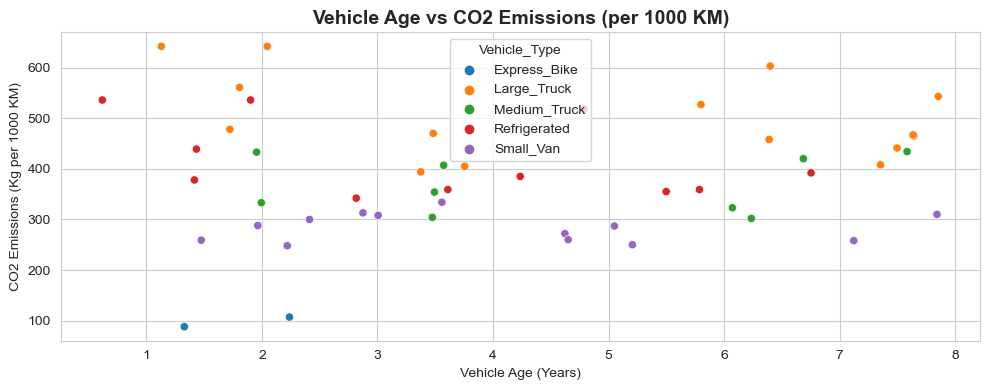

Insights from Vehicle Age vs CO2 Emissions:
- The correlation between vehicle age and emissions is 0.07.
- Older vehicles tend to produce higher CO2 emissions, likely due to engine wear or outdated technology.
- Regular maintenance and gradual fleet renewal can reduce environmental impact.



In [183]:
# Visualization 4: Vehicle Age vs CO2 Emissions

plt.figure(figsize=(10,4))
sns.scatterplot(data=df_vehicle, x='Age_Years', y='CO2_per_1000KM', hue='Vehicle_Type')
plt.title("Vehicle Age vs CO2 Emissions (per 1000 KM)", fontsize=14, weight='bold')
plt.xlabel("Vehicle Age (Years)")
plt.ylabel("CO2 Emissions (Kg per 1000 KM)")
plt.tight_layout()
plt.show()

# Insights:
corr_age = df_vehicle['Age_Years'].corr(df_vehicle['CO2_per_1000KM'])
print("Insights from Vehicle Age vs CO2 Emissions:")
print(f"- The correlation between vehicle age and emissions is {corr_age:.2f}.")
if corr_age > 0:
    print("- Older vehicles tend to produce higher CO2 emissions, likely due to engine wear or outdated technology.")
else:
    print("- There is minimal or no relationship, indicating emissions are stable across different vehicle ages.")
print("- Regular maintenance and gradual fleet renewal can reduce environmental impact.\n")